<a href="https://colab.research.google.com/github/sai-madala/Supervised-M_Learning-Models/blob/main/Log_Reg%2C_KNN__Predicting_SONAR_Rocks_Against_Mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset

sonar_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/sonar data.csv',header=None) 

In [ ]:
sonar_data.head()   # It shows first 5 rows of the dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape    # It shows that it has 208 rows and 61 columns

(208, 61)

In [ ]:
sonar_data.describe()   # It describes the statistical significance of the dataset.

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts() # 60 indicates the column, it contains rocks and mines 

M    111
R     97
Name: 60, dtype: int64

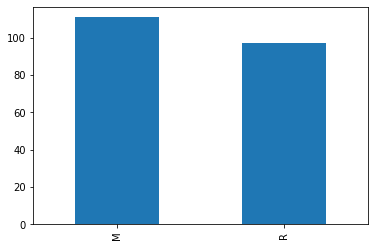

In [ ]:
sonar_data[60].value_counts().plot(kind='bar')    # M-Mines, R-Rocks

In [ ]:
sonar_data.groupby(60).mean() # group this data of mines and rocks through the mean function.

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## **Model Development**

In [ ]:
# Splitting the data set into data(X) and labels (Y). 
# Here,’Y’ is the target variable and whether the detected substance is rock or mine would be based on the inputs provided.

X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

## **Split the data into training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, stratify = Y, random_state= 1)    

#If we change the test size, random state the training and test data set changes

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

## **Model Development using Logistic Regression**

In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)    # Now, we shall fit logistic regression to the training set

LogisticRegression()

## **Model Evaluation for LogReg**

In [ ]:
# Accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data:', training_data_accuracy)

# The model gave us an accuracy score of 83%.

Accuracy on training data: 0.8342245989304813


In [ ]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data:', test_data_accuracy)

# The model gave us an accuracy score of 76%.

Accuracy on test data: 0.7619047619047619


## **Making a predictive system for LogReg to predict whether it is a Rock or Mine**

In [ ]:
input_data = (0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044)

# Changing the input data to numpy array. (numpy.asarray() function is used when we want to convert input to an array.\
# Input can be lists, lists of tuples, tuples, tuples of tuples, tuples of lists and arrays.)

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')  

['R']
The object is a Rock


In [ ]:
input_data = (0.1021,0.0830,0.0577,0.0627,0.0635,0.1328,0.0988,0.1787,0.1199,0.1369,0.2509,0.2631,0.2796,0.2977,0.3823,0.3129,0.3956,0.2093,0.3218,0.3345,0.3184,0.2887,0.3610,0.2566,0.4106,0.4591,0.4722,0.7278,0.7591,0.6579,0.7514,0.6666,0.4903,0.5962,0.6552,0.4014,0.1188,0.3245,0.3107,0.1354,0.5109,0.7988,0.7517,0.5508,0.5858,0.7292,0.5522,0.3339,0.1608,0.0475,0.1004,0.0709,0.0317,0.0309,0.0252,0.0087,0.0177,0.0214,0.0227,0.0106)

# Changing the input data to numpy array.

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')  

['M']
The object is a Mine


In [ ]:
# --------------------

In [ ]:
# Accuracy score of LogReg for test data
model.score(X_test,Y_test)

0.7619047619047619

In [ ]:
# Accuracy score of LogReg for train data
model.score(X_train,Y_train)

0.8342245989304813

In [ ]:
# Confusion matrix for Logreg
# Confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.

Y_prediction = model.predict(X_test)

In [ ]:
pd.crosstab(Y_test, Y_prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,M,R,All
True,,,
M,9,2,11
R,3,7,10
All,12,9,21


## **Model development with kNN**

In [ ]:
# kNN works by selecting the number k of the neighbors followed by a calculation of Euclidean distance.\
# Then, the number of data points is counted in each category and the new data points are assigned to that category. \
# Let’s look at the lines of code

neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# fit kNN classifier to the training data

for i,k in enumerate(neighbors):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, Y_train)
 train_accuracy[i] = knn.score(X_train, Y_train)
 test_accuracy[i] = knn.score(X_test, Y_test)

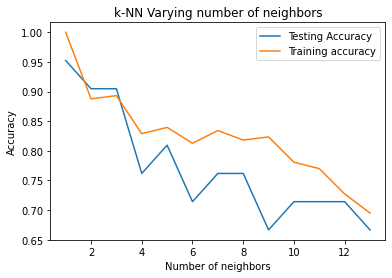

In [ ]:
# plot the number of neighbors against accuracy to select the most suited number of neighbors

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# From the above plot, it can be seen that accuracy for both the training as well as the testing data decreases with the increasing number of neighbors, so k=2 would be a safe number to assume.

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

## **Evaluation of kNN model through accuracy score and confusion matrix**

In [ ]:
# Accuracy score of KNN for test data
knn.score(X_test,Y_test)

0.9047619047619048

In [ ]:
# Accuracy score of KNN for train data
knn.score(X_train,Y_train)

0.8877005347593583

In [ ]:
# Confusion matrix for KNN
Y_pred = knn.predict(X_test)

In [ ]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,M,R,All
True,,,
M,11,0,11
R,2,8,10
All,13,8,21
